# Random Forest


In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
%matplotlib inline


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5401 non-null   int64 
 1   location   5401 non-null   object
 2   review     5401 non-null   object
 3   sentiment  5401 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 168.9+ KB
None
(5401, 4)
   ID     location                                             review  \
0   1  Syambhunath  It is at the top of valleys mountain.  Best pl...   
1   2  Syambhunath  This place has a significant importance in Bud...   
2   3  Syambhunath  Visited this from the other side on a rainy ev...   
3   4  Syambhunath  A beautiful temple situated in the capital wit...   
4   5  Syambhunath  great, beautiful, historic & religious place.....   
5   6  Syambhunath  The view is so pleased and pleasures that it t...   
6   7  Syambhunath  It is a must visit heritage site in kathmandu....   
7   8  Sy

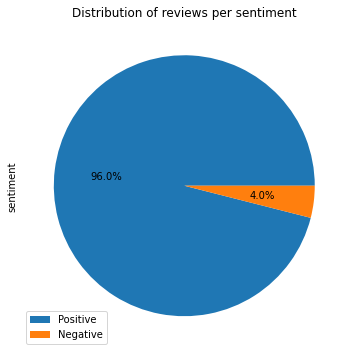

In [44]:
df=pd.read_csv('touristsentimentpn.csv')
print(df.info())
print(df.shape)
print(df.head(10))

df['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

In [45]:
from sklearn.model_selection import train_test_split

features = df.drop("sentiment",axis=1)
labels = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.80, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))


Data distribution:
- Train: 540 
- Validation: 270 
- Test: 270


In [46]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [48]:
tfidf_vect = TfidfVectorizer(analyzer=clean)
tfidf_vect_fit=tfidf_vect.fit(X_train['review'])
X_train=vectorize(X_train['review'],tfidf_vect_fit)

C:\Users\44758\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)

In [50]:
print(scores)
scores.mean()

[0.99074074 0.91666667 0.98148148 0.94444444 0.99074074]


0.9648148148148147

In [51]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        

In [52]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.956 (+/-0.007) for {'max_depth': 2, 'n_estimators': 5}
0.956 (+/-0.007) for {'max_depth': 2, 'n_estimators': 50}
0.956 (+/-0.007) for {'max_depth': 2, 'n_estimators': 100}
0.956 (+/-0.007) for {'max_depth': 10, 'n_estimators': 5}
0.956 (+/-0.007) for {'max_depth': 10, 'n_estimators': 50}
0.956 (+/-0.007) for {'max_depth': 10, 'n_estimators': 100}
0.956 (+/-0.007) for {'max_depth': 20, 'n_estimators': 5}
0.956 (+/-0.007) for {'max_depth': 20, 'n_estimators': 50}
0.956 (+/-0.007) for {'max_depth': 20, 'n_estimators': 100}
0.959 (+/-0.057) for {'max_depth': None, 'n_estimators': 5}
0.969 (+/-0.059) for {'max_depth': None, 'n_estimators': 50}
0.967 (+/-0.062) for {'max_depth': None, 'n_estimators': 100}


In [53]:
cv.best_estimator_


RandomForestClassifier(n_estimators=50)

In [54]:
X_val=vectorize(X_val['review'],tfidf_vect_fit)


C:\Users\44758\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=5)

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val,y_pred), 3)
    precision = round(precision_score(y_val,y_pred), 3)
    recall = round(recall_score(y_val,y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))


MAX DEPTH: 20 / # OF EST: 100 -- A: 0.941 / P: 0.941 / R: 1.0
MAX DEPTH: None / # OF EST: 100 -- A: 0.967 / P: 1.0 / R: 0.965
MAX DEPTH: None / # OF EST: 5 -- A: 0.959 / P: 1.0 / R: 0.957


In [57]:
X_test=vectorize(X_test['review'],tfidf_vect_fit)

y_pred = rf2.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred), 3)
precision = round(precision_score(y_test,y_pred), 3)
recall = round(recall_score(y_test,y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth,
                                                                     rf3.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: None / # OF EST: 5 -- A: 0.967 / P: 1.0 / R: 0.966


C:\Users\44758\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
